- imaset 存放的是要进行增强的原始图片
- fenge 
    - img 存放的是图片进行增强后生成的图片 这里对每张图片随机生成8张（8个子图在一张图片上）
    - result 对img图片分割之后的结果

In [35]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
from PIL import Image
import cv2 as cv
import os
import matplotlib.pyplot as plt

遍历文件夹中的图片，对图片进行数据增强

In [36]:
def geturlPath():
    # 指定路径
    path = './imaset/'
    # 返回指定路径的文件夹名称
    dirs = os.listdir(path)
    # 循环遍历该目录下的照片
    for dir in dirs:
        # 拼接字符串
        pa = path+dir
        # 判断是否为照片
        yield pa

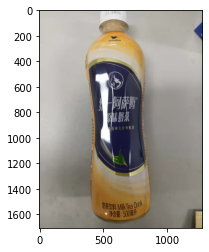

In [37]:
path_img = []
for item in geturlPath():
    img_path = item
    if img_path == './imaset/.DS_Store':
        continue
    path_img.append(img_path)

    assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
    img = Image.open(img_path)
    plt.imshow(img)

        

数据增强，生成扰动图片

In [38]:
def data_aug(img):
  num_rows=2
  num_cols=4
  scale=2
  Y = []
  color_aug = torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0)
  shape_aug = torchvision.transforms.RandomResizedCrop((200, 200), scale=(0.8, 1), ratio=(0.5, 2))

  augs = torchvision.transforms.Compose(
      [torchvision.transforms.RandomHorizontalFlip(), shape_aug, color_aug])

  for _ in range(num_rows * num_cols):
    
    img = augs(img)
    
    Y.append(img)
  
  # Y = [augs(img) for _ in range(num_rows * num_cols)]
 
  d2l.show_images(Y, num_rows, num_cols, scale=scale)
  return Y

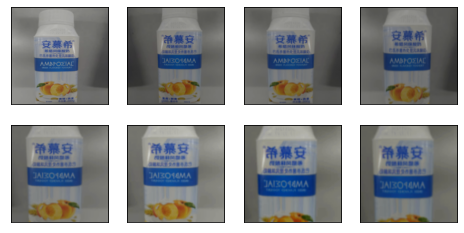

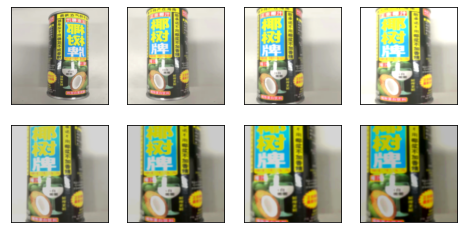

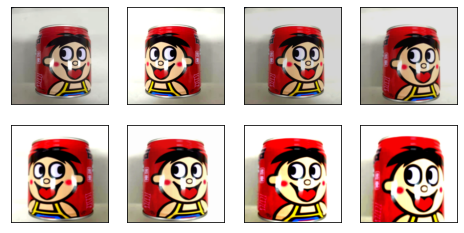

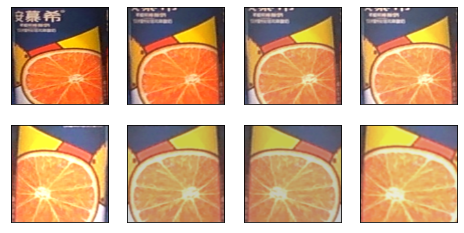

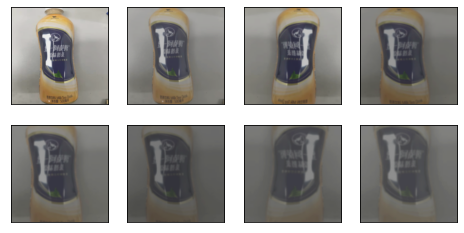

In [39]:
j = 1
for i in range(len(path_img)):
    img = d2l.Image.open(path_img[i])
    # print(img)
    Y = data_aug(img)
    plt.savefig(f"./fenge/img/{j}.jpeg")
    j += 1

对增强后的图片再进行遍历，完成分割操作

In [40]:
def geturlPath1():
    # 指定路径
    path = './fenge/img/'
    # 返回指定路径的文件夹名称
    dirs = os.listdir(path)
    # 循环遍历该目录下的照片
    for dir in dirs:
        # 拼接字符串
        pa = path+dir
        # 判断是否为照片
        yield pa

一张图片增强后生成8张，cut_img1是对上面四张进行分割 cut_img2是对下面四张进行分割

In [41]:
def cut_img1(img,i):
    # img = cv.imread(path)
    # 要被切割的开始的像素的高度值
    beH = 36
    # 要被切割的结束的像素的高度值
    hEnd = 130
    # 要被切割的开始的像素的宽度值
    beW = 71
    # 要被切割的结束的像素的宽度值
    wLen = 169
    for j in range(4):
        dstImg = img[beH:hEnd,beW:wLen]
        dstImg = dstImg[:,:,[2,1,0]]
        plt.axis('off')  # 关掉坐标轴

        plt.imshow(dstImg)
        plt.savefig(f"./fenge/result/{i}_{j}.jpeg")
        
        beW = beW + dstImg.shape[1] + 20
        beH = beH
        hEnd = hEnd
        wLen = wLen + dstImg.shape[1] + 20

In [42]:
def cut_img2(img, i):
# 要被切割的开始的像素的高度值
    beH = 152
    # 要被切割的结束的像素的高度值
    hEnd = 252
    # 要被切割的开始的像素的宽度值
    beW = 71
    # 要被切割的结束的像素的宽度值
    wLen = 169
    for j in range(4):
        dstImg = img[beH:hEnd,beW:wLen]
        dstImg = dstImg[:,:,[2,1,0]]
        plt.axis('off')  # 关掉坐标轴

        plt.imshow(dstImg)
        plt.savefig(f"./fenge/result/{i}__{j}.jpeg")
        
        beW = beW + dstImg.shape[1] + 20
        beH = beH
        hEnd = hEnd
        wLen = wLen + dstImg.shape[1] + 20

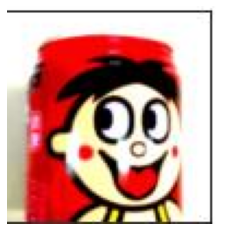

In [43]:
path_img = []
for item in geturlPath1():
    img_path = item
    if img_path == './fenge/img/.DS_Store':
        continue
    path_img.append(img_path)
# print(path_img)
   
for i in range(len(path_img)):
    img = cv.imread(path_img[i])
    cut_img1(img,i)
    cut_img2(img,i)
